## Feature Engineering and Linear Regression for Melbourne Housing Data

## Imported Libraries
Below is the importation of libraries for visualization and computations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('melb_data_sold_train.csv')

## Delete any blanks within the Data Frame
List-wise deletion is used to remove entries with missing values

In [2]:
new_df = df.dropna(axis = 0, how = 'any')

## Inserting a New Feature
Toorak is known as one of the pricest suburbs in Melbourne. A new column in my data frame is created so that it holds the distance in kilometers from the center of Toorak to the latitude/longitude of that row. The latitude / longitude of (-37.841820, 145.015986)is used for the center of Toorak. Assume that the Earth is spherical and has radius of 6371.0088km (the first property in the data frame (-37.68178,144.73779) is approx 30 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
def haversine_distance(pt1,pt2):
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation
    phi_1 = pt1[0]*(math.pi/180)
    lam_1 = pt1[1]*(math.pi/180)
    phi_2 = pt2[0]*(math.pi/180)
    lam_2 = pt2[1]*(math.pi/180)
    
    R = 6371.0088
    
    delta_phi = phi_1 - phi_2
    delta_lam = lam_1 - lam_2
    
    a = (np.sin(delta_phi/2)**2) + np.cos(phi_1) * np.cos(phi_2) * (np.sin(delta_lam/2)**2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    d = R * c
    
    return d

In [4]:
# Step 2 : Use the defintion to calculate the distance for every row in the data frame

df_lat = new_df.loc[0:,'Lattitude']
df_long = new_df.loc[0:,'Longtitude']
t_coord = [-37.841820, 145.015986]

kilometers = []

for i in range(len(df_long)):
    pt2_coord = [df_lat.iloc[i], df_long.iloc[i]]
    kilometers.append(haversine_distance(t_coord, pt2_coord))

# Carry on the new data frame with the extra column named 'distance_to_toorak' for the rest of the homework
new_df = new_df.assign(distance_to_toorak = kilometers)
new_df


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
6,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
7,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
7988,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
7995,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
7997,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Added One Hot encoding to the column 'Type' 
One Hot encoding was added to the column 'Type' to convert the categorical data to help with the algorithm with predictions.

In [5]:
one_hot = pd.get_dummies(new_df.Type, prefix = 'Type')
new_df = pd.concat([new_df, one_hot], axis = 1)
new_df = new_df.drop('Type', axis = 1)
new_df

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,Type_h,Type_t,Type_u
1,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612,1,0,0
3,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843,1,0,0
4,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206,1,0,0
6,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655,1,0,0
7,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,Glenroy,69 Melbourne Av,3,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846,1,0,0
7988,Greensborough,12 Yangoora Pl,4,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623,1,0,0
7995,Highett,1/12 Jillian Av,3,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784,0,1,0
7997,Highett,31 The Crescent,4,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684,0,1,0


## Calculation of correlations between continuous value predictors
The Pearson Correlation method was utilized.

In [6]:
df_values = new_df
df_cvalues = df_values.corr(method = 'pearson')
df_cvalues

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,Type_h,Type_t,Type_u
Rooms,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844,0.501128,-0.040762,-0.535102
Price,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013,0.391761,-0.095295,-0.372766
Postcode,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062,-0.040504,-0.008546,0.051754
Bedroom2,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515,0.484612,-0.037366,-0.518941
Bathroom,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662,0.181773,0.108148,-0.282390
Car,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759,0.214175,-0.006836,-0.236298
Landsize,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420,0.047422,-0.067257,-0.005103
BuildingArea,0.547816,0.465598,0.089355,0.532910,0.470554,0.299613,0.063136,1.000000,0.024754,-0.047501,0.084074,0.076668,0.306231,-0.032396,-0.321614
YearBuilt,-0.030447,-0.330560,0.035561,-0.010031,0.192470,0.153313,0.028638,0.024754,1.000000,0.052205,0.023062,0.300236,-0.402670,0.331105,0.215689
Lattitude,0.012858,-0.224400,-0.445625,0.019970,-0.068643,-0.007839,0.010734,-0.047501,0.052205,1.000000,-0.366331,0.281684,0.121254,-0.028636,-0.115991


## Creation of a Linear Regression Model created to predict home values
I am going to create a linear regression model using the numeric predictor columns I selected in the previous section, and the home value as are the values I am trying to predict. 

In [7]:
# Step one, build the matrix X
df1 = new_df[['Rooms','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','distance_to_toorak','Type_h','Type_u','Type_t']]
df1.loc[:,'1s'] = 1
x = np.array(df1)

In [8]:
# Step two, build the column vector y
df2 = new_df[['Price']].values
y = np.array(df2)

In [9]:
# Step three, find beta hat 
beta_hat = np.linalg.lstsq(x,y, rcond = None)

## Apply the linear regression model to the test data and visualize the error
I will load the melb_data_sold_test.csv data set and use the matrix I calculated in the last step to predict the housing prices for data in that file.  Then, I will create a visualization that shows the error in my predictions. For the visualization, I will create a histogram of the absolute error vs the total housing prices.

In [10]:
# Step zero, load the melb_data_sold_test.csv data for testing. 
#I used Imputation to fill in any missing values 
test = pd.read_csv('melb_data_sold_test.csv')
df_test = test.fillna(test.median())

In [11]:
# Step one, add the new feature for the 'distance_to_toorak' and the one hot encoding to the new data file
df2_lat = df_test.loc[0:,'Lattitude']
df2_long = df_test.loc[0:,'Longtitude']
t_coord = [-37.841820, 145.015986]
distance = []

for i in range(len(df2_long)):
    p2_coord = [df_lat.iloc[i], df_long.iloc[i]]
    distance.append(haversine_distance(t_coord, p2_coord))

df_test = df_test.assign(distance_to_toorak = distance)

one_hot_test = pd.get_dummies(df_test.Type, prefix = 'Type')
df_test = pd.concat([df_test, one_hot_test], axis = 1)
df_test = df_test.drop('Type', axis = 1)
df_test

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,Type_h,Type_t,Type_u
0,Jacana,29 Fox Ct,3,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,140.0,1973.0,Hume,-37.68907,144.91459,Northern Metropolitan,4.261612,1,0,0
1,Keilor Park,45 Collinson St,3,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan,4.621843,1,0,0
2,Kensington,42 Gower St,3,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,140.0,1973.0,Melbourne,-37.79560,144.92779,Northern Metropolitan,4.374206,1,0,0
3,Kew,6/385 Barkers Rd,3,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.780655,0,1,0
4,Kew,11 Raheen Dr,4,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.152012,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,NaN,-37.86887,145.22116,Eastern Metropolitan,5.692685,1,0,0
1017,Werribee,5 Nuragi Ct,4,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,4.098133,1,0,0
1018,Westmeadows,9 Black St,3,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,140.0,1973.0,NaN,-37.67917,144.89390,Northern Metropolitan,4.058104,1,0,0
1019,Wheelers Hill,12 Strada Cr,4,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,140.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,3.363975,1,0,0


In [12]:
# Step two, build the matrix X using the new data frame
test_values = df_test[['Rooms','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','distance_to_toorak','Type_h','Type_u','Type_t']]
test_values.loc[:,'1s'] = 1
X = np.array(test_values)

In [13]:
# Step three, multiply the new matix X by Beta hat. This is my predicted price
pre_price = np.dot(X, beta_hat[0])

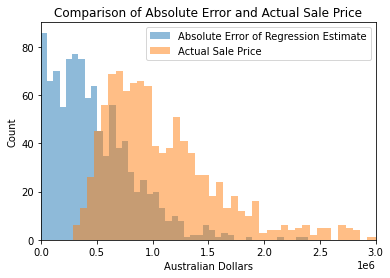

In [14]:
# Step four, calculate the absolute value of actual price - predicted price, I call this my "absolute error"
act_price = pd.DataFrame(df_test['Price'])
price = np.array(act_price)
abs_er = np.absolute((np.subtract(pre_price,price)))
# Create a histogram of the absolute error, and on the same plot create a histogram of the actual price. 
bins = 95
a_bins = 1000
plt.hist(abs_er, a_bins, alpha = 0.5, label = 'Absolute Error of Regression Estimate')
plt.hist(price, bins, alpha = 0.5, label = 'Actual Sale Price')
plt.xlabel("Australian Dollars")
plt.ylabel("Count")
plt.title ("Comparison of Absolute Error and Actual Sale Price")
plt.legend()
plt.xlim(0.0,3000000.0)
plt.show() 